In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e6b48d3be2388129ed48eafcf66bf57f


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | batagay-alyta
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | maniitsoq
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | coquimbo
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | velikie luki
City not found. Skipping...
Processing Record 18 of Set 1 | paragould
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | kulhudhuffushi
Processing Record 21 of Set 1 | ji-parana
City not found. Skippi

Processing Record 36 of Set 4 | mayumba
Processing Record 37 of Set 4 | ilulissat
Processing Record 38 of Set 4 | portree
Processing Record 39 of Set 4 | dikson
Processing Record 40 of Set 4 | sofiysk
City not found. Skipping...
Processing Record 41 of Set 4 | hirado
Processing Record 42 of Set 4 | chimbote
Processing Record 43 of Set 4 | tortoli
Processing Record 44 of Set 4 | tuatapere
Processing Record 45 of Set 4 | tiznit
Processing Record 46 of Set 4 | ozark
Processing Record 47 of Set 4 | gunjur
Processing Record 48 of Set 4 | kabugao
Processing Record 49 of Set 4 | kodiak
Processing Record 50 of Set 4 | goderich
Processing Record 1 of Set 5 | chokurdakh
Processing Record 2 of Set 5 | formoso do araguaia
City not found. Skipping...
Processing Record 3 of Set 5 | saint george
Processing Record 4 of Set 5 | bathsheba
Processing Record 5 of Set 5 | longlac
City not found. Skipping...
Processing Record 6 of Set 5 | storozhevaya
Processing Record 7 of Set 5 | mogadishu
Processing Reco

Processing Record 26 of Set 8 | svoge
Processing Record 27 of Set 8 | sindor
Processing Record 28 of Set 8 | saint anthony
Processing Record 29 of Set 8 | serowe
Processing Record 30 of Set 8 | mizque
Processing Record 31 of Set 8 | merauke
Processing Record 32 of Set 8 | buenaventura
Processing Record 33 of Set 8 | novobirilyussy
Processing Record 34 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 35 of Set 8 | xifeng
Processing Record 36 of Set 8 | iqaluit
Processing Record 37 of Set 8 | koungou
Processing Record 38 of Set 8 | rock sound
Processing Record 39 of Set 8 | andselv
City not found. Skipping...
Processing Record 40 of Set 8 | grindavik
Processing Record 41 of Set 8 | bolama
Processing Record 42 of Set 8 | carballo
Processing Record 43 of Set 8 | anito
Processing Record 44 of Set 8 | ao luk
City not found. Skipping...
Processing Record 45 of Set 8 | gerash
Processing Record 46 of Set 8 | rorvik
Processing Record 47 of Set 8 | wenling
Processing Record 48 of

Processing Record 13 of Set 12 | los llanos de aridane
Processing Record 14 of Set 12 | prince rupert
Processing Record 15 of Set 12 | minas
Processing Record 16 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 12 | talnakh
Processing Record 18 of Set 12 | saldanha
Processing Record 19 of Set 12 | ardrishaig
Processing Record 20 of Set 12 | chernenko
Processing Record 21 of Set 12 | diapaga
Processing Record 22 of Set 12 | tazovskiy
Processing Record 23 of Set 12 | senador jose porfirio
Processing Record 24 of Set 12 | sosnovo-ozerskoye
Processing Record 25 of Set 12 | razole
Processing Record 26 of Set 12 | saint-joseph
Processing Record 27 of Set 12 | charlestown
Processing Record 28 of Set 12 | gardner
Processing Record 29 of Set 12 | jiangkou
Processing Record 30 of Set 12 | les cayes
Processing Record 31 of Set 12 | kumluca
Processing Record 32 of Set 12 | berberati
Processing Record 33 of Set 12 | birjand
Processing Record 34 of Set 12 | nioro
Proc

In [11]:
import json

# JSON dumps
city_data_json = json.dumps(city_data)

# Save city data to JSON file.
with open('city_data.json', 'w') as outfile:
    json.dumps(city_data_json)

In [12]:
# Read JSON string into a dictionary.
city_data_dict = json.loads(city_data_json)

In [13]:
city_data_df = pd.DataFrame.from_dict(city_data_dict)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.26,61,0,8.05,AR,2022-04-14 11:19:54
1,Batagay-Alyta,67.8006,130.4114,10.22,98,100,2.04,RU,2022-04-14 11:19:54
2,Busselton,-33.6500,115.3333,62.82,71,0,12.62,AU,2022-04-14 11:19:55
3,Fortuna,40.5982,-124.1573,46.98,95,100,1.01,US,2022-04-14 11:19:55
4,Butaritari,3.0707,172.7902,81.00,79,63,11.68,KI,2022-04-14 11:19:55
5,Jamestown,42.0970,-79.2353,62.19,59,75,9.22,US,2022-04-14 11:14:56
6,Atuona,-9.8000,-139.0333,78.15,80,27,14.76,PF,2022-04-14 11:19:56
7,Lebu,-37.6167,-73.6500,49.55,71,0,4.61,CL,2022-04-14 11:19:56
8,Maniitsoq,65.4167,-52.9000,17.56,80,28,14.74,GL,2022-04-14 11:19:57
9,Geraldton,-28.7667,114.6000,70.21,83,0,12.66,AU,2022-04-14 11:19:57


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-04-14 11:19:54,-54.8000,-68.3000,44.26,61,0,8.05
1,Batagay-Alyta,RU,2022-04-14 11:19:54,67.8006,130.4114,10.22,98,100,2.04
2,Busselton,AU,2022-04-14 11:19:55,-33.6500,115.3333,62.82,71,0,12.62
3,Fortuna,US,2022-04-14 11:19:55,40.5982,-124.1573,46.98,95,100,1.01
4,Butaritari,KI,2022-04-14 11:19:55,3.0707,172.7902,81.00,79,63,11.68
5,Jamestown,US,2022-04-14 11:14:56,42.0970,-79.2353,62.19,59,75,9.22
6,Atuona,PF,2022-04-14 11:19:56,-9.8000,-139.0333,78.15,80,27,14.76
7,Lebu,CL,2022-04-14 11:19:56,-37.6167,-73.6500,49.55,71,0,4.61
8,Maniitsoq,GL,2022-04-14 11:19:57,65.4167,-52.9000,17.56,80,28,14.74
9,Geraldton,AU,2022-04-14 11:19:57,-28.7667,114.6000,70.21,83,0,12.66


In [15]:
# Create the output file (csv).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

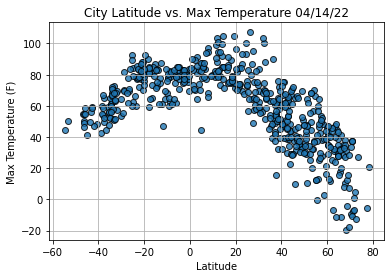

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

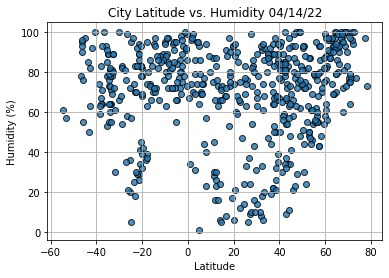

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

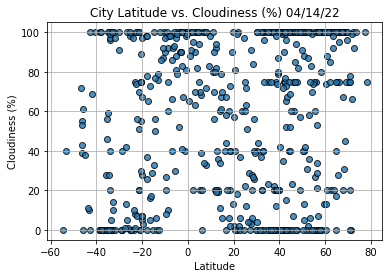

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

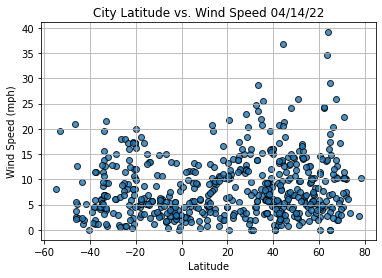

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data.
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]

index13

City                     Coquimbo
Country                        CL
Date          2022-04-14 11:16:34
Lat                      -29.9533
Lng                      -71.3436
Max Temp                    53.33
Humidity                      100
Cloudiness                    100
Wind Speed                   3.44
Name: 13, dtype: object

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

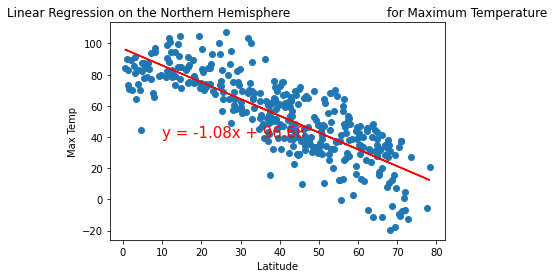

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

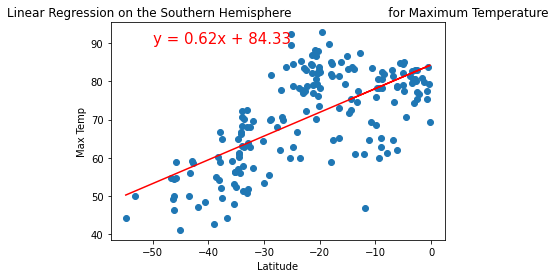

In [32]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

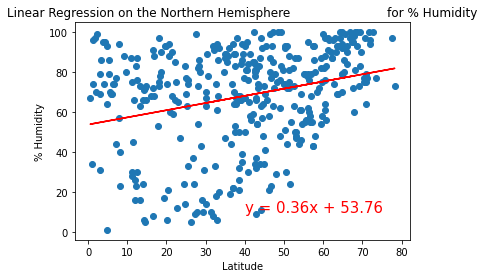

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

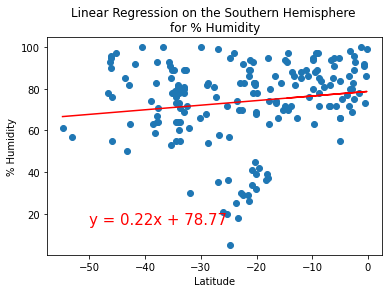

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

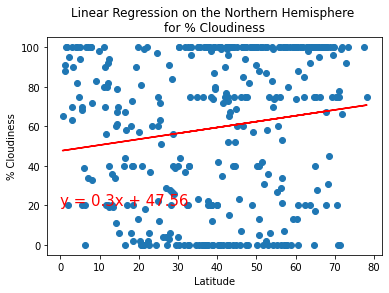

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(0,20))

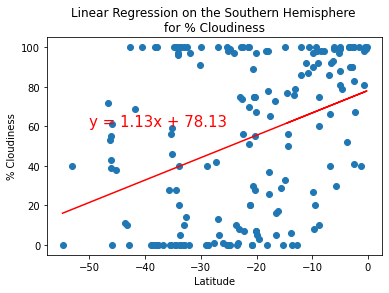

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

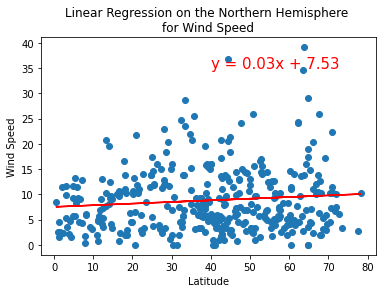

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

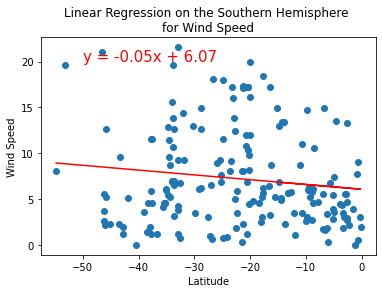

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,20))